# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.106559e+01     8.301117e+00
 * time: 0.0022211074829101562
     1     2.711988e+01     4.100205e+00
 * time: 0.009131193161010742
     2     1.814860e+01     3.857006e+00
 * time: 0.016267061233520508
     3     1.199610e+01     2.226090e+00
 * time: 0.023411035537719727
     4     1.112136e+01     2.422867e+00
 * time: 0.02917313575744629
     5     1.017680e+01     1.419205e+00
 * time: 0.034963130950927734
     6     9.522453e+00     1.063076e+00
 * time: 0.07148218154907227
     7     9.026424e+00     1.074497e+00
 * time: 0.07649517059326172
     8     8.565789e+00     7.898470e-01
 * time: 0.08120608329772949
     9     8.274579e+00     6.374584e-01
 * time: 0.08587503433227539
    10     8.101223e+00     5.521061e-01
 * time: 0.09040403366088867
    11     8.018825e+00     5.215777e-01
 * time: 0.09501910209655762
    12     8.002018e+00     8.677510e-01
 * time: 0.09901618957519531
    13     7.973463e+00     6.426582e-01
 *

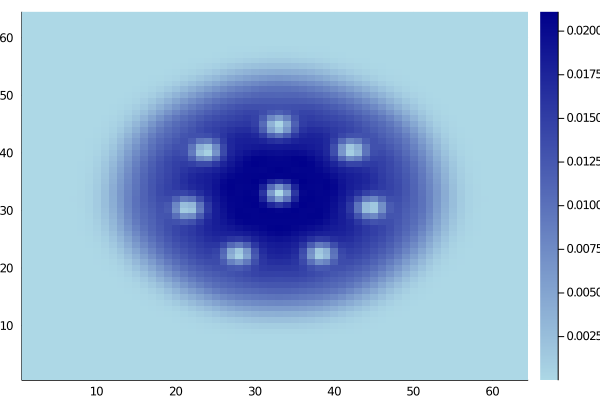

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)